In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.arange(-2,2,0.1)
y = normal_dist.pdf(x)

NameError: name 'normal_dist' is not defined

In [ ]:
xy = np.vstack([x,y]).T

In [83]:
yx = np.vstack([y,x]).T

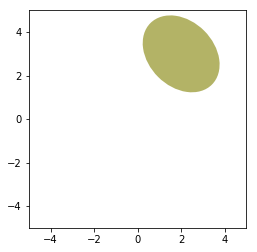

In [14]:
ax = plt.subplot(111, aspect='equal')
ell = Ellipse(xy = (2,3), width = 3, height = 4, angle=45)
ell.set_facecolor([0.7,0.7,0.4])
ax.add_patch(ell)
plt.axis([-5,5,-5,5])
plt.show()

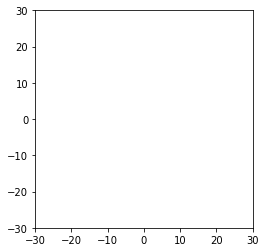

In [4]:
x = [5,7,11,15,16,17,18]
y = [8, 5, 8, 9, 17, 18, 25]
cov = np.cov(x, y)
lambda_, v = np.linalg.eig(cov)
lambda_ = np.sqrt(lambda_)
from matplotlib.patches import Ellipse
import matplotlib.pyplot as plt
ax = plt.subplot(111, aspect='equal')
for j in xrange(1, 4):
    ell = Ellipse(xy=(np.mean(x), np.mean(y)),
                  width=lambda_[0]*j*2, height=lambda_[1]*j*2,
                  angle=np.rad2deg(np.arccos(v[0, 0])))
    ell.set_facecolor('none')
    ax.add_artist(ell)
#plt.scatter(x, y)
plt.axis([-30,30,-30,30])
plt.show()

In [58]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from scipy.stats import norm as normal_dist

def plot_gaussian_1D(mu, sigma, ax,offset = None, bound= None, orient = 'h'):
    n = 100
    if bound is None:
        bound = [mu-2*sigma, mu+2*sigma]
        
    x = np.linspace(bound[0], bound[1], n)
    y = normal_dist(loc=mu, scale=sigma).pdf(x)
    y = y/np.max(y)
    if offset is not None:
        y += offset
    
    if orient == 'h':
        poly_data = np.vstack([x,y]).T
        axis_limit = [bound[0], bound[1], 0, np.max(y)]
    else:
        poly_data = np.vstack([y,x]).T
        axis_limit = [0, np.max(y), bound[0], bound[1]]
        
    polygon = Polygon(poly_data,True)
    #plt.plot(y,x)
    ax.add_patch(polygon)

    plt.axis(axis_limit)
    return

def plot_gaussian_2D(Mu, Sigma, pi = 1.):
    

[-3, 3, -0.5, 3]

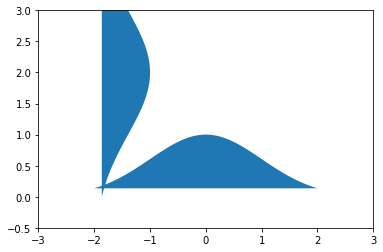

In [74]:
fig,ax = plt.subplots()
plot_gaussian_1D(0,1,ax, bound = np.array([-2,2]))
plot_gaussian_1D(2,1,ax,offset = -2,orient='v')
edge = 3
plt.axis([-edge,edge,-0.5,edge])

In [ ]:
model.nbVar = 2; %Number of variables [x1,x2]


%% Load  data
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
load('data/faithful.mat');
Data = faithful';
Data(1,:) = Data(1,:)*1E1;


%% Gaussian conditioning 
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
model.Mu = mean(Data,2);
model.Sigma = cov(Data');

in=1; out=2;
DataIn = 50;

MuOut = model.Mu(out) + model.Sigma(out,in) / model.Sigma(in,in) * (DataIn-model.Mu(in));
SigmaOut = model.Sigma(out,out) - model.Sigma(out,in) / model.Sigma(in,in) * model.Sigma(in,out);
slope = model.Sigma(out,in)/model.Sigma(in,in);


%% Plot
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
mrg = [10 10];
limAxes = [min(Data(1,:))-mrg(1) max(Data(1,:))+mrg(1) min(Data(2,:))-mrg(2) max(Data(2,:))+mrg(2)];

figure('PaperPosition',[0 0 4 3],'position',[10,50,1600,1200]); hold on; %axis off;
plot(DataIn+[-50,50], MuOut+slope*[-50,50], ':','linewidth',1,'color',[.7 .3 .3]);
plot([model.Mu(1) model.Mu(1)], [limAxes(3) model.Mu(2)], ':','linewidth',1,'color',[.7 .3 .3]);
plot([limAxes(1) model.Mu(1)], [model.Mu(2) model.Mu(2)], ':','linewidth',1,'color',[.7 .3 .3]);

%Plot joint distribution
plotGMM(model.Mu, model.Sigma, [.8 0 0]);
%Plot marginal distribution horizontally
plotGaussian1D(model.Mu(1), model.Sigma(1,1), [limAxes(1) limAxes(3) limAxes(2)-limAxes(1) 10], [.8 0 0], 1, 'h');
%Plot marginal distribution vertically
plotGaussian1D(model.Mu(2), model.Sigma(2,2), [limAxes(1) limAxes(3) 10 limAxes(4)-limAxes(3)], [.8 0 0], 1, 'v');
%Plot conditional distribution vertically
plotGaussian1D(MuOut, SigmaOut, [limAxes(1) limAxes(3) 10 limAxes(4)-limAxes(3)], [0 0 .8], 1, 'v');

plot(DataIn,MuOut,'.','markersize',12,'color',[.7 .3 .3]);
plot(DataIn,limAxes(3),'.','markersize',26,'color',[0 0 .8]);
plot([DataIn DataIn], [limAxes(3) MuOut], ':','linewidth',1,'color',[.7 .3 .3]);
plot([limAxes(1) DataIn], [MuOut MuOut], ':','linewidth',1,'color',[.7 .3 .3]);

axis(limAxes);
set(gca,'Xtick',[]); set(gca,'Ytick',[]);
xlabel('x^I'); ylabel('x^O');
